<h1> Problem Statement</h1>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h1>Reading and Understanding Data (EDA)</h1>

In [2]:
bike_df=pd.read_csv("bike_sharing/day.csv")
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
#checking rows and columns of data
bike_df.shape

(730, 16)

In [4]:
#checking datatype
print(bike_df.dtypes.to_markdown())

|            | 0       |
|:-----------|:--------|
| instant    | int64   |
| dteday     | object  |
| season     | int64   |
| yr         | int64   |
| mnth       | int64   |
| holiday    | int64   |
| weekday    | int64   |
| workingday | int64   |
| weathersit | int64   |
| temp       | float64 |
| atemp      | float64 |
| hum        | float64 |
| windspeed  | float64 |
| casual     | int64   |
| registered | int64   |
| cnt        | int64   |


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Missing values percentage in each column overview
print(((bike_df.isna().sum()/len(bike_df.index))*100).to_markdown())

|            |   0 |
|:-----------|----:|
| instant    |   0 |
| dteday     |   0 |
| season     |   0 |
| yr         |   0 |
| mnth       |   0 |
| holiday    |   0 |
| weekday    |   0 |
| workingday |   0 |
| weathersit |   0 |
| temp       |   0 |
| atemp      |   0 |
| hum        |   0 |
| windspeed  |   0 |
| casual     |   0 |
| registered |   0 |
| cnt        |   0 |


We see there are no missing values

In [7]:
#checking unique values in each column
print(bike_df.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


dteday and instant have high cardinality and are not significant variables hence we drop it

In [8]:
#from the given data we can see that instant is an index column so we drop it,
#dteday information can be fetched from other columns(yr, mnth) hence dropping these two
bike_df2=bike_df.drop(['instant','dteday'],axis=1)

In [9]:
bike_df2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [10]:
bike_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


<li>from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
<li>We will replace season,weekday and weathersit with appropriate values

In [11]:
bike_df2['season']=bike_df2['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"})
bike_df2['weathersit']=bike_df2['weathersit'].replace({1:"Clear_Partly_cloud",2:"Misty_cloudy",3:"Light_snow_rain",4:"Heavy_rain_snow_mist"})
bike_df2['weekday']=bike_df2['weekday'].replace({0:"sun",1:"mon",2:"tue",3:"wed",4:"thurs",5:"fri",6:"sat"})


In [12]:
bike_df2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,sat,0,Misty_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,sun,0,Misty_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,mon,1,Clear_Partly_cloud,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,tue,1,Clear_Partly_cloud,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,wed,1,Clear_Partly_cloud,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,thurs,1,Misty_cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,spring,1,12,0,fri,1,Misty_cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,spring,1,12,0,sat,0,Misty_cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,spring,1,12,0,sun,0,Clear_Partly_cloud,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [13]:
bike_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.0+ KB


In [14]:
#correcting datatypes
data_types_dict = {'mnth': str,'weekday':str}
bike_df2=bike_df2.astype(data_types_dict)

In [15]:
bike_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


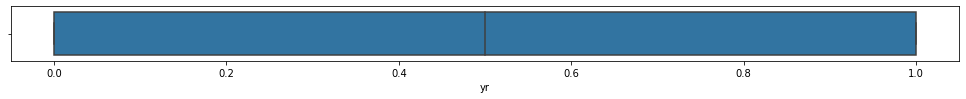

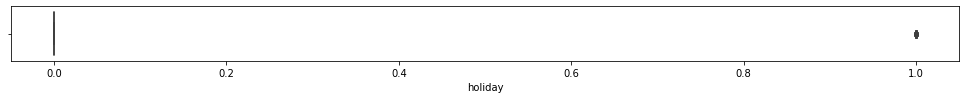

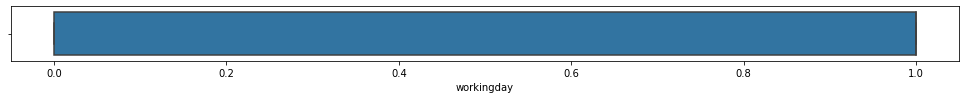

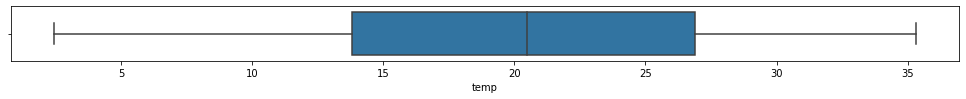

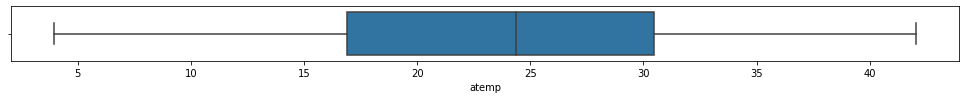

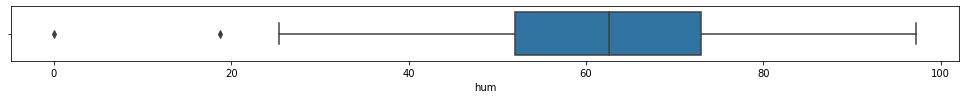

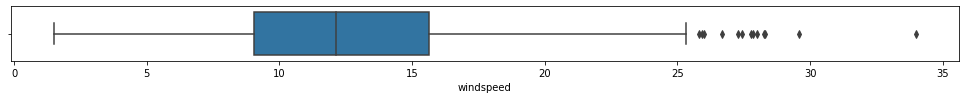

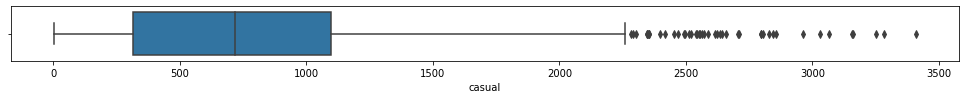

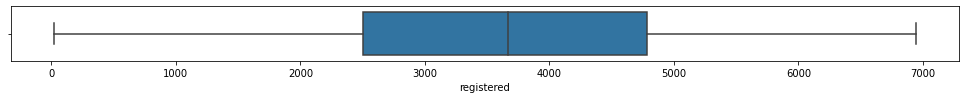

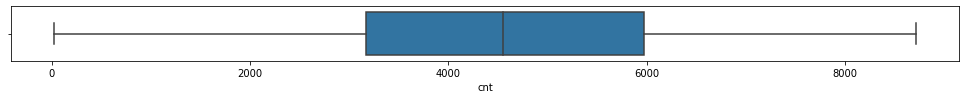

In [16]:
#Plotting box plots outlier detection
bike_sel_col=bike_df2.select_dtypes(exclude=['object'])
for column in bike_sel_col:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=bike_df2, x=column)

No outlier treatment required in any of the columns

<h1>Univariate Analysis</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

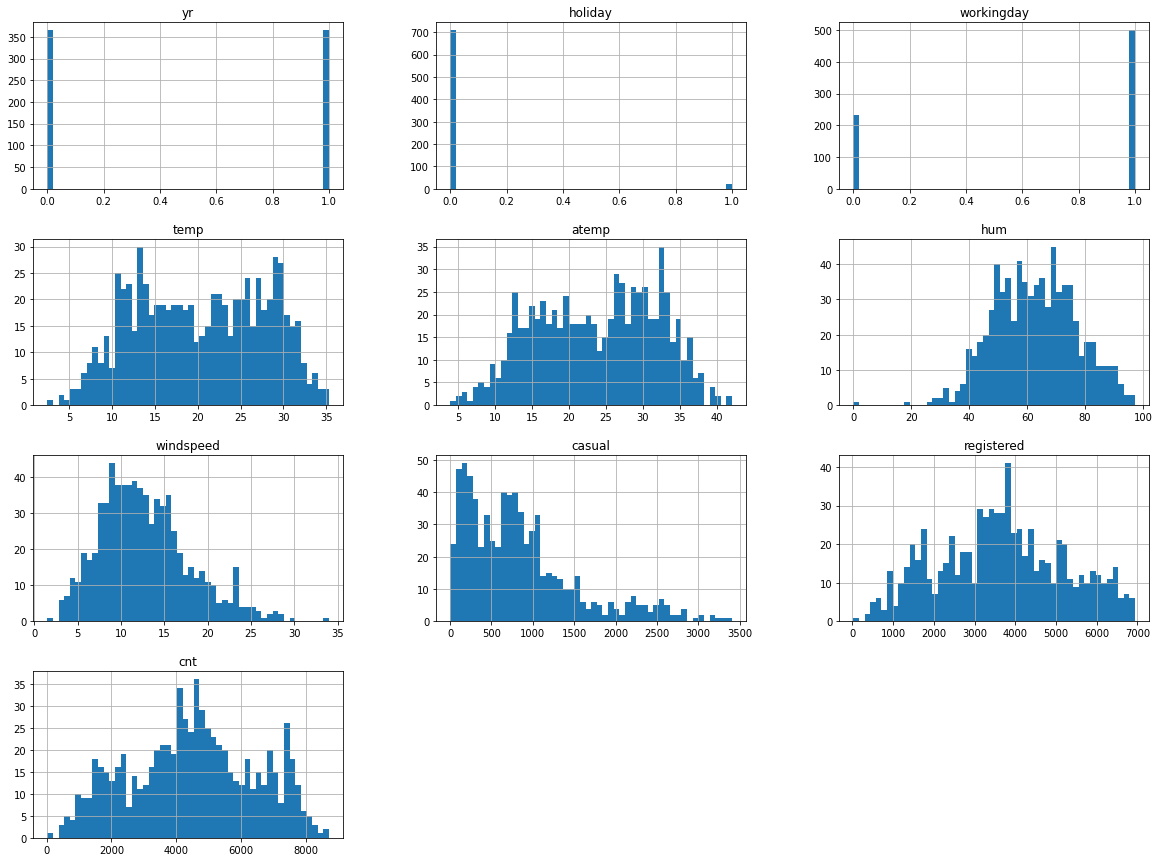

In [17]:
#check distribution of all the variables in loan data
bike_df2.hist(bins = 50, figsize = (20,15))
plt.show


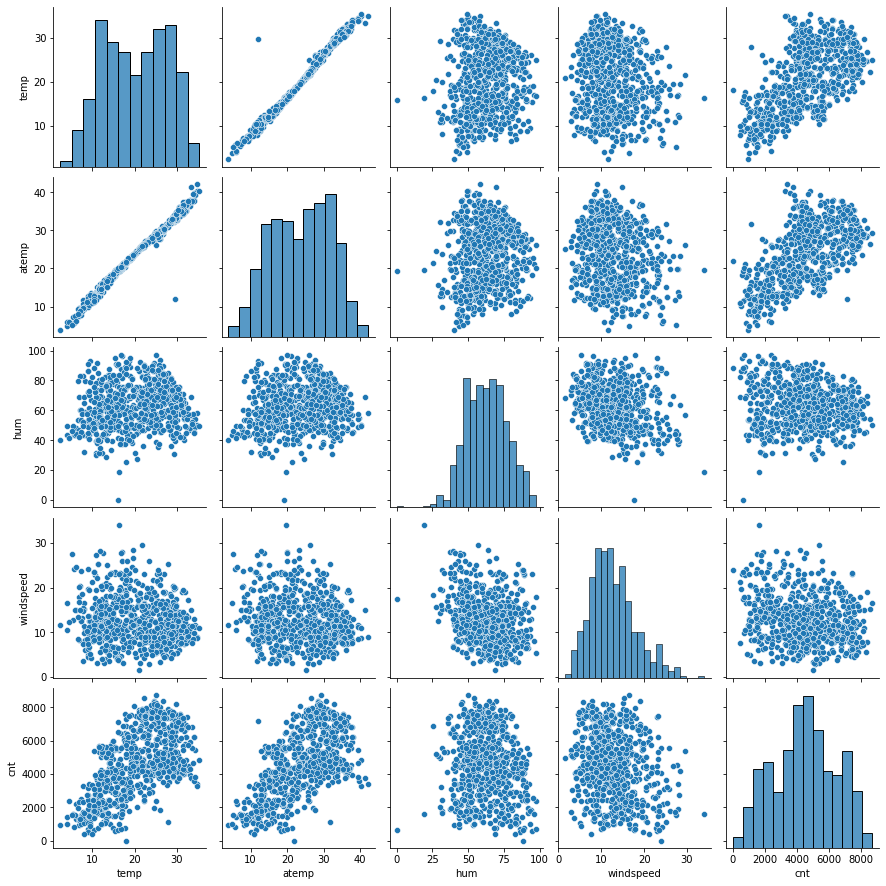

In [18]:
# plotting the pairplots for the variables- 'temp','atemp','hum','windspeed',"cnt"
sns.pairplot(bike_df2,vars=['temp','atemp','hum','windspeed',"cnt"],palette="BuGn_r")
plt.show()

<li> we see there is a relationship between temp and atemp
<li> Lets check the correlation 

In [19]:
corr=bike_df2.corr()
corr.style.background_gradient(cmap='coolwarm') 

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<li>correlation between temp and atemp is 0.99,we can drop temp as atemp and temp have high correlation, using any one of it would be sufficient
<li>Dropping registered and casual also as target variable is cnt and these two basically add up to show cnt

In [20]:
bike_df3=bike_df2.drop(['temp',"registered","casual"],axis=1)
bike_df3

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,sat,0,Misty_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear_Partly_cloud,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear_Partly_cloud,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear_Partly_cloud,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,thurs,1,Misty_cloudy,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,fri,1,Misty_cloudy,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,sat,0,Misty_cloudy,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,sun,0,Clear_Partly_cloud,11.58500,48.3333,23.500518,1796


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

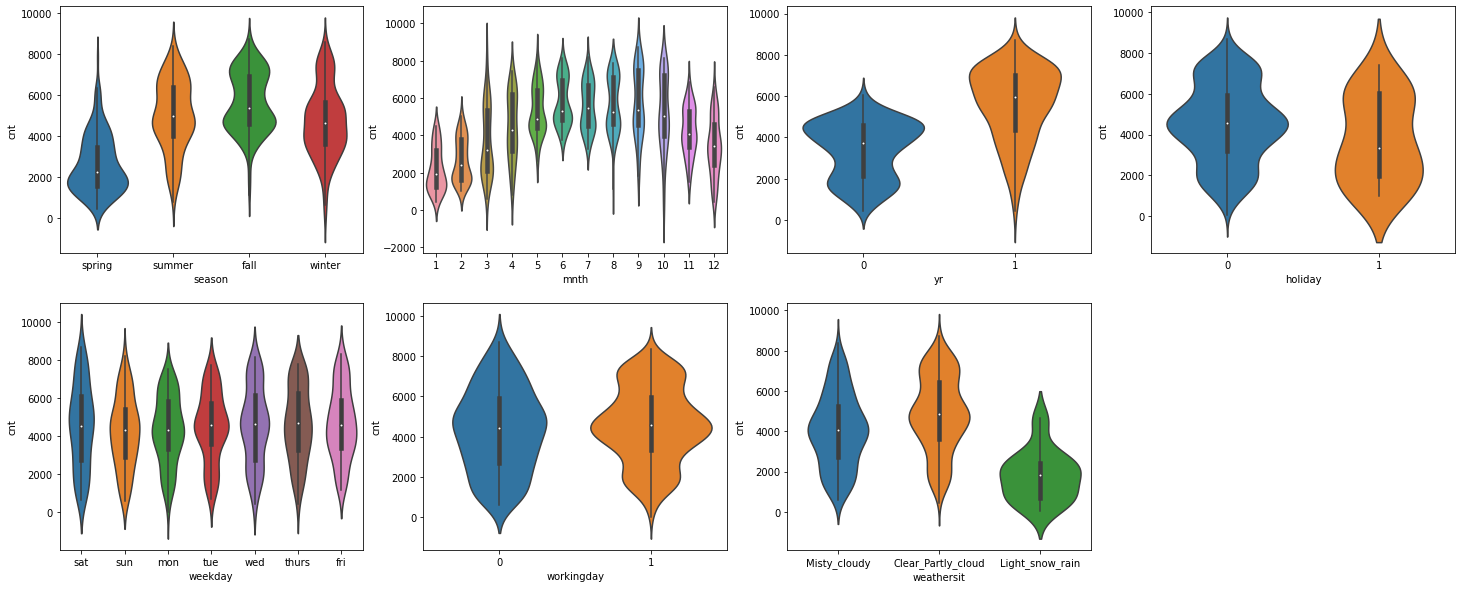

In [136]:
#segmented analysis of the the categorical columns
plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.violinplot(x='season', y='cnt', data=bike_df3)
plt.subplot(2,4,2)
sns.violinplot(x='mnth', y='cnt', data=bike_df3)
plt.subplot(2,4,3)
sns.violinplot(x='yr', y='cnt', data=bike_df3)
plt.subplot(2,4,4)
sns.violinplot(x='holiday', y='cnt', data=bike_df3)
plt.subplot(2,4,5)
sns.violinplot(x='weekday', y='cnt', data=bike_df3)
plt.subplot(2,4,6)
sns.violinplot(x='workingday', y='cnt', data=bike_df3)
plt.subplot(2,4,7)
sns.violinplot(x='weathersit', y='cnt', data=bike_df3)

<h1>Create dummy variables</h1>

In [22]:
#Before creating dummy varaible lets check the cardinality for all the object type columns (season,mnth,yr,workingday,weathersit,holiday)
bike_df3.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [23]:
#Selecting variables for creating dummy variable
bike_df_dummy=bike_df3[["season","mnth","weathersit","weekday"]]
bike_df_dummy

,season,mnth,weathersit,weekday
0,spring,1,Misty_cloudy,sat
1,spring,1,Misty_cloudy,sun
2,spring,1,Clear_Partly_cloud,mon
3,spring,1,Clear_Partly_cloud,tue
4,spring,1,Clear_Partly_cloud,wed
...,...,...,...,...
725,spring,12,Misty_cloudy,thurs
726,spring,12,Misty_cloudy,fri
727,spring,12,Misty_cloudy,sat
728,spring,12,Clear_Partly_cloud,sun


In [24]:
#Create dummy variables
season=pd.get_dummies(bike_df_dummy['season'],drop_first=True)
weather_cond=pd.get_dummies(bike_df_dummy['weathersit'],drop_first=True)
week_day=pd.get_dummies(bike_df_dummy['weekday'],drop_first=True)
month=pd.get_dummies(bike_df_dummy['mnth'],drop_first=True)

In [25]:
#concatenating the dummy varaibles to original dataframe
bike_df_concat = pd.concat([bike_df3, season, weather_cond, month, week_day], axis=1)
bike_df_concat

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,6,7,8,9,mon,sat,sun,thurs,tue,wed
0,spring,0,1,0,sat,0,Misty_cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,1,0,sun,0,Misty_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,1,0,mon,1,Clear_Partly_cloud,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,1,0,tue,1,Clear_Partly_cloud,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,1,0,wed,1,Clear_Partly_cloud,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,thurs,1,Misty_cloudy,11.33210,65.2917,23.458911,...,0,0,0,0,0,0,0,1,0,0
726,spring,1,12,0,fri,1,Misty_cloudy,12.75230,59.0000,10.416557,...,0,0,0,0,0,0,0,0,0,0
727,spring,1,12,0,sat,0,Misty_cloudy,12.12000,75.2917,8.333661,...,0,0,0,0,0,1,0,0,0,0
728,spring,1,12,0,sun,0,Clear_Partly_cloud,11.58500,48.3333,23.500518,...,0,0,0,0,0,0,1,0,0,0


In [26]:
#dropping the not required columns (whose dummy varaibles have been formed)
bike_df4=bike_df_concat.drop(["season","mnth","weathersit","weekday"], axis=1)

In [27]:
bike_df4

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,6,7,8,9,mon,sat,sun,thurs,tue,wed
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,1,0,0
726,1,0,1,12.75230,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,12.12000,75.2917,8.333661,1341,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0


<h1>Model building and evaluation</h1>

Splitting train test population 

In [28]:
train, test = train_test_split(bike_df4, train_size = 0.7, test_size = 0.3, random_state = 42)

In [29]:
train

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,6,7,8,9,mon,sat,sun,thurs,tue,wed
683,1,0,1,16.22460,62.0417,10.250129,5445,0,0,1,...,0,0,0,0,0,0,0,1,0,0
645,1,1,0,19.38040,70.9583,12.708493,5478,0,0,1,...,0,0,0,0,1,0,0,0,0,0
163,0,0,1,30.08270,49.4583,20.458450,5020,0,1,0,...,1,0,0,0,1,0,0,0,0,0
360,0,0,1,16.38165,76.2500,12.626150,1162,1,0,0,...,0,0,0,0,0,0,0,0,1,0
640,1,0,1,29.95665,79.3750,4.458569,7572,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1,0,0,17.96040,82.3333,8.333393,4649,0,0,1,...,0,0,0,0,0,0,1,0,0,0
71,0,0,0,19.00455,52.7391,18.130468,2417,1,0,0,...,0,0,0,0,0,0,1,0,0,0
106,0,0,0,22.28480,47.9583,20.334232,3744,0,1,0,...,0,0,0,0,0,0,1,0,0,0
270,0,0,1,28.75790,84.8750,9.958143,3907,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [30]:
train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,6,7,8,9,mon,sat,sun,thurs,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,24.015409,63.445998,12.589779,4557.639216,0.231373,0.256863,0.250980,...,0.084314,0.092157,0.074510,0.090196,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216
std,0.500025,0.163554,0.471169,8.119292,13.929550,4.966644,1937.436761,0.422124,0.437332,0.434003,...,0.278131,0.289531,0.262857,0.286744,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,431.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.383900,52.793900,9.041918,3296.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.473225,63.979200,11.771197,4591.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.556050,73.437475,15.562542,6039.250000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,28.250014,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Using minmaxscaler() scaler to scale the features to be used in model for fair evaluation and bring them on same scale

In [31]:
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [32]:
#now lets check if everything is within similar range
train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,6,7,8,9,mon,sat,sun,thurs,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,0.250980,...,0.084314,0.092157,0.074510,0.090196,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216
std,0.500025,0.163554,0.471169,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,0.434003,...,0.278131,0.289531,0.262857,0.286744,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Taking cnt as the target variable in y_train and x_train will have rest of the dataframe values aprt from target variable
y_train = train.pop('cnt')
X_train = train

In [34]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light_snow_rain', 'Misty_cloudy', '10', '11', '12',
       '2', '3', '4', '5', '6', '7', '8', '9', 'mon', 'sat', 'sun', 'thurs',
       'tue', 'wed'],
      dtype='object')

In [35]:
#Feature selection using RFE(reverse feature engineering)
model = LinearRegression()
rf = RFE(model,n_features_to_select = None)            
rf = rf.fit(X_train, y_train)

In [36]:
print(rf.support_)
print(rf.ranking_) 

[ True False False  True  True  True  True False  True  True  True False
  True  True False  True False False False  True False  True False  True
 False False False False]
[ 1  3  2  1  1  1  1  9  1  1  1  5  1  1 10  1 15  4 11  1 14  1  8  1
  7 13  6 12]


In [37]:
column = X_train.columns[rf.support_]
column

Index(['yr', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'Light_snow_rain', 'Misty_cloudy', '11', '12', '3', '7', '9', 'sat'],
      dtype='object')

In [38]:
#Creating X_train with rfe identified significant columns
X_train_rfe_col = X_train[column]

In [39]:
#Method to drop column from feature list
def Model_Drop_columns(X_train_rfe_col,drop_column):
    X_train_rfe_col=X_train_rfe_col.drop([drop_column],axis=1)
    return X_train_rfe_col

In [40]:
#Method to get VIF for each feature
def VIF_DATA(X_train_rfe_col):
    #checking vif scores
    vif = pd.DataFrame()
    X = X_train_rfe_col
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    vif_data = vif_data.sort_values(by = "VIF", ascending = False)  
    print(vif_data)

In [41]:
#Building model with statsmodel
X_train_rfe1 = sm.add_constant(X_train_rfe_col)
m = sm.OLS(y_train,X_train_rfe1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.67e-185
Time:                        11:15:58   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -934.9
Df Residuals:                     495   BIC:                            -871.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3298      0.037     

In [42]:
VIF_DATA(X_train_rfe_col)

            feature        VIF
2               hum  25.008908
1             atemp  17.454736
3         windspeed   5.036741
4            spring   2.739111
5            winter   2.720828
7      Misty_cloudy   2.243580
0                yr   2.094713
8                11   1.835045
11                7   1.479989
9                12   1.370631
6   Light_snow_rain   1.283663
12                9   1.240195
13              sat   1.187163
10                3   1.174139


In [43]:
#COLUMN sat is insignificant hence removing it as it has high p value(>0.05)
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"sat")

In [44]:
X_train_rfe1 = sm.add_constant(X_train_rfe_col)
m1 = sm.OLS(y_train,X_train_rfe1).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.37e-186
Time:                        11:15:58   Log-Likelihood:                 481.34
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     496   BIC:                            -875.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3343      0.037     

In [45]:
VIF_DATA(X_train_rfe_col)

            feature        VIF
2               hum  24.912434
1             atemp  17.452798
3         windspeed   4.996583
4            spring   2.738889
5            winter   2.720154
7      Misty_cloudy   2.241520
0                yr   2.093833
8                11   1.834439
11                7   1.479810
9                12   1.370011
6   Light_snow_rain   1.282822
12                9   1.239869
10                3   1.170020


In [46]:
#Column month "3" is insignificant hence removing it has it has high p value(>0.05)
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"3")

In [47]:
X_train_rfe2 = sm.add_constant(X_train_rfe_col)
m2 = sm.OLS(y_train,X_train_rfe2).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          8.45e-186
Time:                        11:15:58   Log-Likelihood:                 477.61
No. Observations:                 510   AIC:                            -929.2
Df Residuals:                     497   BIC:                            -874.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3421      0.037     

In [48]:
VIF_DATA(X_train_rfe_col)

            feature        VIF
2               hum  24.906447
1             atemp  17.407862
3         windspeed   4.996179
5            winter   2.718086
4            spring   2.639824
7      Misty_cloudy   2.226093
0                yr   2.092530
8                11   1.834226
10                7   1.471781
9                12   1.358323
6   Light_snow_rain   1.275065
11                9   1.234322


In [49]:
#After removing insignificant variables, lets remove variables with high VIF
#Remove hum which has the highest vif
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"hum")
X_train_rfe3 = sm.add_constant(X_train_rfe_col)
m3 = sm.OLS(y_train,X_train_rfe3).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.7
Date:                Sun, 29 May 2022   Prob (F-statistic):          4.62e-183
Time:                        11:15:58   Log-Likelihood:                 468.31
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     498   BIC:                            -861.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2430      0.029     

In [50]:
VIF_DATA(X_train_rfe_col)

            feature       VIF
1             atemp  5.307722
2         windspeed  4.942041
4            winter  2.380991
0                yr  2.088883
7                11  1.788951
3            spring  1.698913
6      Misty_cloudy  1.559467
9                 7  1.422593
8                12  1.314316
10                9  1.227348
5   Light_snow_rain  1.096345


In [51]:
#Remove atemp which has the highest vif
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"atemp")
X_train_rfe4 = sm.add_constant(X_train_rfe_col)
m4 = sm.OLS(y_train,X_train_rfe4).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.94e-158
Time:                        11:15:59   Log-Likelihood:                 407.30
No. Observations:                 510   AIC:                            -792.6
Df Residuals:                     499   BIC:                            -746.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5448      0.015     

In [52]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
1        windspeed  2.766686
3           winter  2.356135
0               yr  1.912906
6               11  1.768876
2           spring  1.563661
5     Misty_cloudy  1.509135
7               12  1.308368
8                7  1.145427
9                9  1.138600
4  Light_snow_rain  1.091367


In [53]:
#column "7" month has high p value hence dropping as it is insignificant
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"7")
X_train_rfe5 = sm.add_constant(X_train_rfe_col)
m5 = sm.OLS(y_train,X_train_rfe5).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          2.13e-159
Time:                        11:15:59   Log-Likelihood:                 406.82
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     500   BIC:                            -751.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5496      0.015     

In [54]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
1        windspeed  2.640471
3           winter  2.321719
0               yr  1.865045
6               11  1.768263
5     Misty_cloudy  1.508359
2           spring  1.506627
7               12  1.308305
8                9  1.128368
4  Light_snow_rain  1.091365


In [55]:
#column "winter" has high p value hence dropping as it is insignificant
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"winter")
X_train_rfe6 = sm.add_constant(X_train_rfe_col)
m6 = sm.OLS(y_train,X_train_rfe6).fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.70e-160
Time:                        11:15:59   Log-Likelihood:                 405.81
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     501   BIC:                            -755.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5547      0.014     

In [56]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
1        windspeed  2.587518
0               yr  1.838663
4     Misty_cloudy  1.483197
2           spring  1.404214
5               11  1.122448
7                9  1.116165
6               12  1.114279
3  Light_snow_rain  1.083686


In [57]:
#windspeed has high VIF value hence dropping 
X_train_rfe_col=Model_Drop_columns(X_train_rfe_col,"windspeed")
X_train_rfe7 = sm.add_constant(X_train_rfe_col)
m7 = sm.OLS(y_train,X_train_rfe7).fit()
print(m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          2.52e-155
Time:                        11:15:59   Log-Likelihood:                 391.61
No. Observations:                 510   AIC:                            -767.2
Df Residuals:                     502   BIC:                            -733.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4963      0.009     

In [58]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.447902
3     Misty_cloudy  1.332136
1           spring  1.209398
5               12  1.114063
6                9  1.094270
4               11  1.062379
2  Light_snow_rain  1.029518


In [59]:
#checking each variable one by one adding the remaining columns
print(X_train.columns[~rf.support_])

Index(['holiday', 'workingday', 'summer', '10', '2', '4', '5', '6', '8', 'mon',
       'sun', 'thurs', 'tue', 'wed'],
      dtype='object')


In [60]:
#Add "holiday" and check if the model improves
X_train_rfe_col['holiday']=X_train["holiday"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,holiday
683,1,0,0,1,1,0,0,0
645,1,0,0,1,0,0,0,1
163,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0
640,1,0,0,1,0,0,0,0


In [61]:
X_train_rfe8 = sm.add_constant(X_train_rfe_col)
m8 = sm.OLS(y_train,X_train_rfe8).fit()
print(m8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.95e-155
Time:                        11:15:59   Log-Likelihood:                 394.70
No. Observations:                 510   AIC:                            -771.4
Df Residuals:                     501   BIC:                            -733.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4975      0.009     

In [62]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.452313
3     Misty_cloudy  1.332193
1           spring  1.224035
5               12  1.116738
6                9  1.095003
4               11  1.066970
7          holiday  1.037475
2  Light_snow_rain  1.030238


We see model improves hence keep holiday

In [63]:
#Add "workingday" and check if the model improves
X_train_rfe_col['workingday']=X_train["workingday"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,holiday,workingday
683,1,0,0,1,1,0,0,0,1
645,1,0,0,1,0,0,0,1,0
163,0,0,0,0,0,0,0,0,1
360,0,1,0,1,0,1,0,0,1
640,1,0,0,1,0,0,0,0,1


In [64]:
X_train_rfe9 = sm.add_constant(X_train_rfe_col)
m9 = sm.OLS(y_train,X_train_rfe9).fit()
print(m9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     192.5
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.03e-156
Time:                        11:16:00   Log-Likelihood:                 399.39
No. Observations:                 510   AIC:                            -778.8
Df Residuals:                     500   BIC:                            -736.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4744      0.012     

In [65]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
8       workingday  1.911818
0               yr  1.712018
3     Misty_cloudy  1.445265
1           spring  1.277225
6                9  1.123213
5               12  1.118443
4               11  1.101614
7          holiday  1.060780
2  Light_snow_rain  1.042888


we see model improves but p value of holiday is high hence removing it

In [66]:
X_train_rfe_col=X_train_rfe_col.drop(['holiday'],axis=1)

In [67]:
X_train_rfe10= sm.add_constant(X_train_rfe_col)
m10 = sm.OLS(y_train,X_train_rfe10).fit()
print(m10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          8.69e-157
Time:                        11:16:00   Log-Likelihood:                 397.88
No. Observations:                 510   AIC:                            -777.8
Df Residuals:                     501   BIC:                            -739.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4705      0.012     

In [68]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
7       workingday  1.869815
0               yr  1.692076
3     Misty_cloudy  1.443469
1           spring  1.253562
6                9  1.120545
5               12  1.115163
4               11  1.092665
2  Light_snow_rain  1.042791


In [69]:
#Add "summer" and check if the model improves
X_train_rfe_col['summer']=X_train["summer"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,workingday,summer
683,1,0,0,1,1,0,0,1,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,1,1
360,0,1,0,1,0,1,0,1,0
640,1,0,0,1,0,0,0,1,0


In [70]:
X_train_rfe11 = sm.add_constant(X_train_rfe_col)
m11 = sm.OLS(y_train,X_train_rfe11).fit()
print(m11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          2.34e-158
Time:                        11:16:00   Log-Likelihood:                 404.37
No. Observations:                 510   AIC:                            -788.7
Df Residuals:                     500   BIC:                            -746.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4922      0.013     

In [71]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
7       workingday  2.110646
0               yr  1.762319
3     Misty_cloudy  1.497213
8           summer  1.466405
1           spring  1.346142
6                9  1.176339
5               12  1.136804
4               11  1.134086
2  Light_snow_rain  1.045975


In [72]:
#workingday VIF is high hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['workingday'],axis=1)

In [73]:
X_train_rfe12 = sm.add_constant(X_train_rfe_col)
m12 = sm.OLS(y_train,X_train_rfe10).fit()
print(m12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          8.69e-157
Time:                        11:16:00   Log-Likelihood:                 397.88
No. Observations:                 510   AIC:                            -777.8
Df Residuals:                     501   BIC:                            -739.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4705      0.012     

In [74]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.621267
3     Misty_cloudy  1.441637
7           summer  1.299085
1           spring  1.255794
5               12  1.130258
6                9  1.122350
4               11  1.080008
2  Light_snow_rain  1.037987


In [75]:
#Add "10" month and check if the model improves
X_train_rfe_col['10']=X_train["10"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,summer,10
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,1
163,0,0,0,0,0,0,0,1,0
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,1


In [76]:
X_train_rfe13 = sm.add_constant(X_train_rfe_col)
m13 = sm.OLS(y_train,X_train_rfe13).fit()
print(m13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          9.67e-156
Time:                        11:16:00   Log-Likelihood:                 398.20
No. Observations:                 510   AIC:                            -776.4
Df Residuals:                     500   BIC:                            -734.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5145      0.012     

In [77]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.738657
3     Misty_cloudy  1.513099
7           summer  1.347243
1           spring  1.288695
8               10  1.166706
5               12  1.142863
6                9  1.141892
4               11  1.092434
2  Light_snow_rain  1.061081


In [78]:
#high p value of "10" Month column hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['10'],axis=1)

In [79]:
#Add "2" and check if the model improves
X_train_rfe_col['2']=X_train["2"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,summer,2
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,1,0
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [80]:
X_train_rfe14 = sm.add_constant(X_train_rfe_col)
m14 = sm.OLS(y_train,X_train_rfe14).fit()
print(m14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.17e-155
Time:                        11:16:01   Log-Likelihood:                 398.01
No. Observations:                 510   AIC:                            -776.0
Df Residuals:                     500   BIC:                            -733.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5180      0.011     

In [81]:
#high p value of 2
X_train_rfe_col=X_train_rfe_col.drop(['2'],axis=1)

In [82]:
#Add "4" and check if the model improves
X_train_rfe_col['4']=X_train["4"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,summer,4
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,1,0
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [83]:
X_train_rfe15 = sm.add_constant(X_train_rfe_col)
m15 = sm.OLS(y_train,X_train_rfe15).fit()
print(m15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sun, 29 May 2022   Prob (F-statistic):          5.33e-161
Time:                        11:16:01   Log-Likelihood:                 410.60
No. Observations:                 510   AIC:                            -801.2
Df Residuals:                     500   BIC:                            -758.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5182      0.011     

In [84]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
7           summer  1.797482
0               yr  1.621314
8                4  1.492852
3     Misty_cloudy  1.442068
1           spring  1.255809
5               12  1.130258
6                9  1.122365
4               11  1.080013
2  Light_snow_rain  1.040339


In [85]:
#high p value for summer
X_train_rfe_col=X_train_rfe_col.drop(['summer'],axis=1)

In [86]:
X_train_rfe16 = sm.add_constant(X_train_rfe_col)
m16 = sm.OLS(y_train,X_train_rfe16).fit()
print(m16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sun, 29 May 2022   Prob (F-statistic):          5.31e-162
Time:                        11:16:01   Log-Likelihood:                 410.14
No. Observations:                 510   AIC:                            -802.3
Df Residuals:                     501   BIC:                            -764.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5133      0.009     

In [87]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.493465
3     Misty_cloudy  1.356663
1           spring  1.221541
5               12  1.118655
6                9  1.101481
7                4  1.078921
4               11  1.066996
2  Light_snow_rain  1.037562


In [88]:
#Add "5" and check if the model improves
X_train_rfe_col['5']=X_train["5"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,5
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [89]:
X_train_rfe17 = sm.add_constant(X_train_rfe_col)
m17 = sm.OLS(y_train,X_train_rfe17).fit()
print(m17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          6.86e-161
Time:                        11:16:01   Log-Likelihood:                 410.34
No. Observations:                 510   AIC:                            -800.7
Df Residuals:                     500   BIC:                            -758.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5153      0.010     

In [90]:
#High p value for column "5", hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['5'],axis=1)

In [91]:
#Add "6" and check if the model improves
X_train_rfe_col['6']=X_train["6"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,6
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,0,1
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [92]:
X_train_rfe18 = sm.add_constant(X_train_rfe_col)
m18 = sm.OLS(y_train,X_train_rfe18).fit()
print(m18.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          2.74e-161
Time:                        11:16:01   Log-Likelihood:                 411.28
No. Observations:                 510   AIC:                            -802.6
Df Residuals:                     500   BIC:                            -760.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5077      0.010     

In [93]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.538084
3     Misty_cloudy  1.374923
1           spring  1.231259
5               12  1.121695
6                9  1.107420
7                4  1.083220
4               11  1.070797
8                6  1.059409
2  Light_snow_rain  1.037662


In [94]:
#High p value for column "6", hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['6'],axis=1)

In [95]:
#Add "8" and check if the model improves
X_train_rfe_col['8']=X_train["8"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,8
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [96]:
X_train_rfe18 = sm.add_constant(X_train_rfe_col)
m18 = sm.OLS(y_train,X_train_rfe18).fit()
print(m18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 29 May 2022   Prob (F-statistic):          8.00e-161
Time:                        11:16:02   Log-Likelihood:                 410.18
No. Observations:                 510   AIC:                            -800.4
Df Residuals:                     500   BIC:                            -758.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5124      0.010     

In [97]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.537466
3     Misty_cloudy  1.378600
1           spring  1.231825
5               12  1.121922
6                9  1.107778
7                4  1.083489
4               11  1.070978
8                8  1.062994
2  Light_snow_rain  1.037681


In [98]:
#High p value for column "8", hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['8'],axis=1)

In [99]:
#Add "mon" and check if the model improves
X_train_rfe_col['mon']=X_train["mon"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,mon
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,1
163,0,0,0,0,0,0,0,0,1
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [100]:
X_train_rfe19 = sm.add_constant(X_train_rfe_col)
m19 = sm.OLS(y_train,X_train_rfe19).fit()
print(m19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sun, 29 May 2022   Prob (F-statistic):          5.99e-161
Time:                        11:16:02   Log-Likelihood:                 410.48
No. Observations:                 510   AIC:                            -801.0
Df Residuals:                     500   BIC:                            -758.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5147      0.010     

In [101]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.531479
3     Misty_cloudy  1.369546
1           spring  1.231750
8              mon  1.142511
5               12  1.119820
6                9  1.103201
7                4  1.087929
4               11  1.069885
2  Light_snow_rain  1.039194


In [102]:
#High p value for column "mon", hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['mon'],axis=1)

In [103]:
#Add "sun" and check if the model improves
X_train_rfe_col['sun']=X_train["sun"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,sun
683,1,0,0,1,1,0,0,0,0
645,1,0,0,1,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0,0
640,1,0,0,1,0,0,0,0,0


In [104]:
X_train_rfe20 = sm.add_constant(X_train_rfe_col)
m20 = sm.OLS(y_train,X_train_rfe20).fit()
print(m20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     209.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.52e-163
Time:                        11:16:02   Log-Likelihood:                 416.60
No. Observations:                 510   AIC:                            -813.2
Df Residuals:                     500   BIC:                            -770.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5197      0.009     

In [105]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.516507
3     Misty_cloudy  1.361131
1           spring  1.254266
8              sun  1.147931
5               12  1.119660
6                9  1.107377
7                4  1.090578
4               11  1.074127
2  Light_snow_rain  1.037833


keeping sunday as the model improves

In [106]:
#Add "thurs" and check if the model improves
X_train_rfe_col['thurs']=X_train["thurs"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,sun,thurs
683,1,0,0,1,1,0,0,0,0,1
645,1,0,0,1,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0,0,0
640,1,0,0,1,0,0,0,0,0,0


In [107]:
X_train_rfe21 = sm.add_constant(X_train_rfe_col)
m21 = sm.OLS(y_train,X_train_rfe21).fit()
print(m21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.12e-162
Time:                        11:16:02   Log-Likelihood:                 417.32
No. Observations:                 510   AIC:                            -812.6
Df Residuals:                     499   BIC:                            -766.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5167      0.010     

In [108]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.553760
3     Misty_cloudy  1.368274
1           spring  1.264247
8              sun  1.166439
9            thurs  1.134002
5               12  1.122013
6                9  1.113720
7                4  1.096505
4               11  1.085679
2  Light_snow_rain  1.038384


In [109]:
#High p value for column "thurs", hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['thurs'],axis=1)

In [110]:
#Add "tue" and check if the model improves
X_train_rfe_col['tue']=X_train["tue"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,sun,tue
683,1,0,0,1,1,0,0,0,0,0
645,1,0,0,1,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0,0,1
640,1,0,0,1,0,0,0,0,0,0


In [111]:
X_train_rfe22 = sm.add_constant(X_train_rfe_col)
m22 = sm.OLS(y_train,X_train_rfe22).fit()
print(m22.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sun, 29 May 2022   Prob (F-statistic):          8.89e-163
Time:                        11:16:03   Log-Likelihood:                 417.56
No. Observations:                 510   AIC:                            -813.1
Df Residuals:                     499   BIC:                            -766.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5228      0.010     

In [112]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.534858
3     Misty_cloudy  1.385817
1           spring  1.265558
8              sun  1.163470
9              tue  1.121458
5               12  1.120125
6                9  1.111346
7                4  1.091930
4               11  1.079953
2  Light_snow_rain  1.043039


In [113]:
#High p value for column "tue", hence removing it
X_train_rfe_col=X_train_rfe_col.drop(['tue'],axis=1)

In [114]:
#Add "wed" and check if the model improves
X_train_rfe_col['wed']=X_train["wed"]
X_train_rfe_col.head()

,yr,spring,Light_snow_rain,Misty_cloudy,11,12,9,4,sun,wed
683,1,0,0,1,1,0,0,0,0,0
645,1,0,0,1,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0
360,0,1,0,1,0,1,0,0,0,0
640,1,0,0,1,0,0,0,0,0,1


In [115]:
X_train_rfe23 = sm.add_constant(X_train_rfe_col)
m23 = sm.OLS(y_train,X_train_rfe23).fit()
print(m23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.55e-162
Time:                        11:16:03   Log-Likelihood:                 416.98
No. Observations:                 510   AIC:                            -812.0
Df Residuals:                     499   BIC:                            -765.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5173      0.010     

In [116]:
VIF_DATA(X_train_rfe_col)

           feature       VIF
0               yr  1.539307
3     Misty_cloudy  1.368150
1           spring  1.266469
8              sun  1.162712
9              wed  1.124430
5               12  1.120185
6                9  1.118497
7                4  1.093992
4               11  1.077588
2  Light_snow_rain  1.054695


In [117]:
X_train_rfe_col=X_train_rfe_col.drop(['wed'],axis=1)

<h4>We have seen all the features combinations hence we will stop the model building exercise now,the final model is m23 


In [118]:
#Predict values
y_train_pred = m23.predict(X_train_rfe23)

<h2>Residual Analysis

In [119]:
# canclulate residual
res=y_train - y_train_pred

<function matplotlib.pyplot.show(close=None, block=None)>

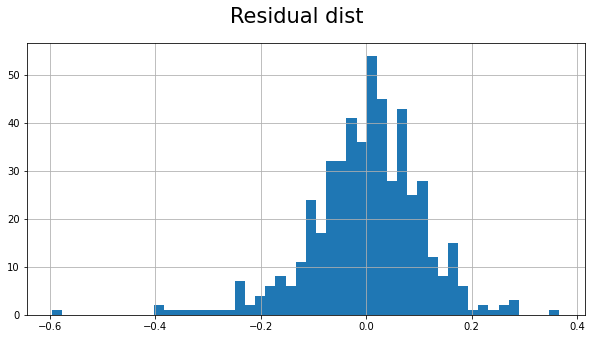

In [120]:
#check distribution of residual
res.hist(bins = 50, figsize = (10,5))
plt.suptitle('Residual dist', fontsize = 21)                  
plt.show

Residuals are normally distributed

In [121]:
#Scaling the test data
col=['atemp','hum','windspeed','cnt']
test[col] = scaler.fit_transform(test[col])

In [122]:
#Creating x and y sets
y_test = test.pop('cnt')
X_test = test

In [123]:
X_train_23=X_train_rfe23.drop(['const'], axis=1)
X_test = X_test[X_train_23.columns]
X_test = sm.add_constant(X_test)

In [124]:
#Making predictions on the chosen model
y_pred = m23.predict(X_test)

In [125]:
y_pred

468    0.655242
148    0.471552
302    0.471552
355   -0.016612
515    0.763258
         ...   
332    0.288111
532    0.717471
558    0.675858
137    0.442243
314    0.375512
Length: 219, dtype: float64

<h1> Model Evaluation

Text(0.5, 0.98, 'Actual and Predicted')

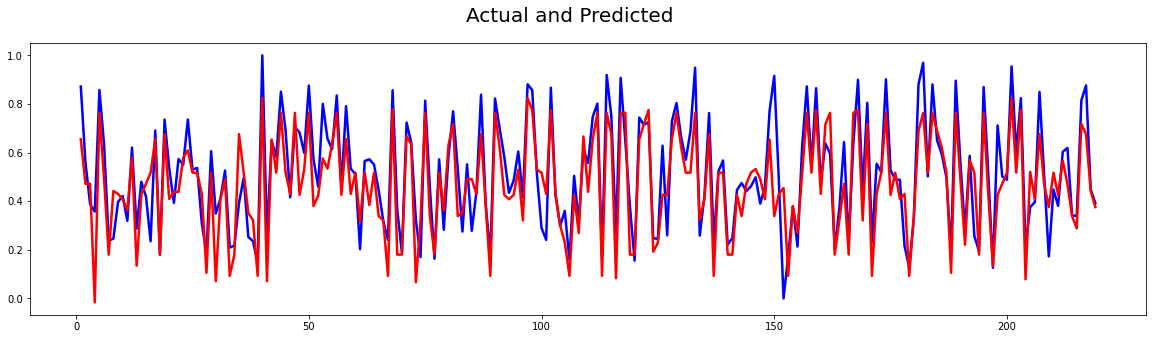

In [126]:
#Plot Actual vs Predicted graph representation
c = [i for i in range(1,220,1)] 
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 

Text(0, 0.5, 'ytest-ypred')

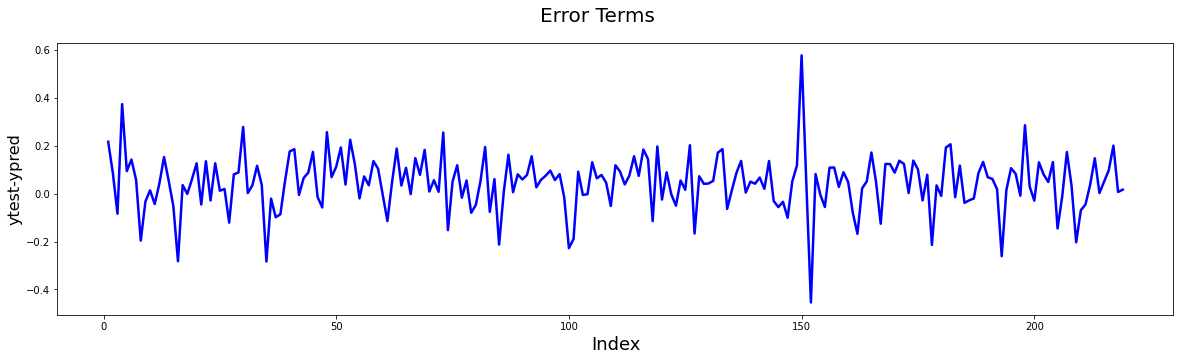

In [127]:
# Plot Error terms
c = [i for i in range(1,220,1)]
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16) 

In [128]:
#Returns the mean squared error
print("MSE=",mean_squared_error(y_test, y_pred))

MSE= 0.01518597503047879


Model is getting a mean square error of 1.5 which means the model is not able to match 1.5% of the values only, which is good


In [129]:
#Calculate R-square
print("R2 score=",r2_score(y_test, y_pred)*100,"%")


R2 score= 70.20065923568237 %


The r square value is about 70% which means our model is able to explain 70% of the variance which is also good.

Text(0, 0.5, 'ypred')

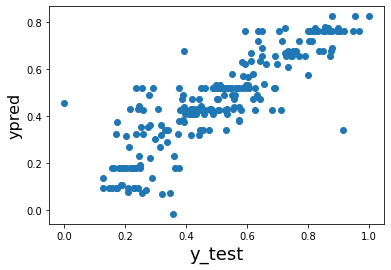

In [130]:
#linear graph between ypred and ytest
plt.plot(y_test, y_pred, 'o')
fig.suptitle('y_test - y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('ypred', fontsize=16) 


In [131]:
#Our final model summary
print(m23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.55e-162
Time:                        11:16:06   Log-Likelihood:                 416.98
No. Observations:                 510   AIC:                            -812.0
Df Residuals:                     499   BIC:                            -765.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5173      0.010     

<H3>The equation for best fitted line is will be-

    cnt= 0.5173+0.246 X yr - 0.337 X spring - 0.309 X Light_snow_rain - 0.087 X Misty_cloudy - 0.1418 X "11" -0.109 X "12" + 0.061 X "9" -0.108 X "4" -0.046 X sun + 0.0123 X wed

<H1>Demand for bikes depends on these variables:</H1>
 yr,spring,Light_snow_rain,Light_snow_rain,11,12,9,4,sun,wed
 
<li>Variables contributing to decrese in demand- spring,Light_snow_rain,Misty_cloudy, months (11,12,4) and weekday (sunday)
<li>Variables contributing to increase in demand- yr, month (9) and weekday (wednesday)

<h1> Recommendation
<li>Month 9 and wednesday in weekday has a positive impact on bike demand